# 房價預測模型
---
模型01 - 對照組

使用Kaggle資料集預測房屋價格

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.shape

pd.options.display.max_columns = 25
data.head()

# data.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data["year"] = pd.to_numeric(data["date"].str.slice(0, 4))
data["month"] = pd.to_numeric(data["date"].str.slice(4, 6))
data["day"] = pd.to_numeric(data["date"].str.slice(6, 8))

data.drop(["id"], axis=1, inplace=True)
data.drop(["date"], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [4]:
data_num = data.shape[0]
indexs = np.random.permutation(data_num)

train_indexs = indexs[:int(data_num*0.6)]
val_indexs = indexs[int(data_num*0.6):int(data_num*0.8)]
test_indexs = indexs[int(data_num*0.8):]

train_data = data.loc[train_indexs]
val_data = data.loc[val_indexs]
test_data = data.loc[test_indexs]

train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
16929,725000.0,5,2.50,3210,12000,1.0,0,0,4,8,1830,1380,1968,0,98007,47.6205,-122.148,2450,12000,2014,6,13
18238,750000.0,4,2.25,3140,12150,2.0,0,0,3,9,3140,0,1979,0,98074,47.6361,-122.047,2370,12054,2014,12,19
15272,237000.0,3,2.00,1210,6634,1.0,0,0,4,7,1210,0,1985,0,98031,47.4097,-122.193,1560,7200,2014,8,12
3642,593700.0,3,2.50,2000,22000,2.0,0,0,3,8,2000,0,1979,0,98075,47.5900,-122.081,2180,19800,2015,2,18
7314,295000.0,3,2.50,1500,3060,2.0,0,0,3,7,1500,0,1994,0,98006,47.5605,-122.117,2700,7734,2015,2,18


In [5]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std

mean = val_data.mean()
std = val_data.std()
val_data = (val_data - mean) / std

# val_data.mean()
# val_data.std()

In [6]:
x_train = np.array(train_data.drop("price", axis=1))
y_train = np.array(train_data["price"])
x_val = np.array(val_data.drop("price", axis=1))
y_val = np.array(val_data["price"])

print(x_val.shape)
print(y_val.shape)

(4323, 21)
(4323,)


In [7]:
model = keras.Sequential(name="model-1")

model.add(layers.Dense(64, activation="relu", input_shape=(21, )))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1))

print(model.summary())

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(keras.optimizers.Adam(0.001), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [9]:
model_dir = "logs/models/"
if not os.path.exists(model_dir):
    print("new dir!")
    os.makedirs(model_dir)

log_dir = os.path.join("logs", "model-1")
model_cdk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+"best-model-1.h5", monitor="val_mean_absolute_error", 
                                             save_best_only=True, mode="min")

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100,
                    validation_data=(x_val, y_val), callbacks=[model_cdk, model_mckp])

Epoch 1/100
203/203 [==============================] - 6s 27ms/step - loss: 0.3430 - mean_absolute_error: 0.3615 - val_loss: 0.2458 - val_mean_absolute_error: 0.3127
Epoch 2/100
203/203 [==============================] - 1s 7ms/step - loss: 0.2065 - mean_absolute_error: 0.2872 - val_loss: 0.2217 - val_mean_absolute_error: 0.2826
Epoch 3/100
203/203 [==============================] - 1s 7ms/step - loss: 0.1824 - mean_absolute_error: 0.2693 - val_loss: 0.2084 - val_mean_absolute_error: 0.2906
Epoch 4/100
203/203 [==============================] - 1s 7ms/step - loss: 0.1671 - mean_absolute_error: 0.2577 - val_loss: 0.1943 - val_mean_absolute_error: 0.2860
Epoch 5/100
203/203 [==============================] - 1s 7ms/step - loss: 0.1485 - mean_absolute_error: 0.2429 - val_loss: 0.1705 - val_mean_absolute_error: 0.2454
Epoch 6/100
203/203 [==============================] - 1s 6ms/step - loss: 0.1358 - mean_absolute_error: 0.2324 - val_loss: 0.1682 - val_mean_absolute_error: 0.2434
Epoch 7/1

203/203 [==============================] - 1s 7ms/step - loss: 0.0581 - mean_absolute_error: 0.1654 - val_loss: 0.1321 - val_mean_absolute_error: 0.2104
Epoch 51/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.1650 - val_loss: 0.1326 - val_mean_absolute_error: 0.2209
Epoch 52/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.1646 - val_loss: 0.1369 - val_mean_absolute_error: 0.2159
Epoch 53/100
203/203 [==============================] - 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.1620 - val_loss: 0.1366 - val_mean_absolute_error: 0.2147
Epoch 54/100
203/203 [==============================] - 1s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.1647 - val_loss: 0.1298 - val_mean_absolute_error: 0.2196
Epoch 55/100
203/203 [==============================] - 2s 8ms/step - loss: 0.0565 - mean_absolute_error: 0.1643 - val_loss: 0.1308 - val_mean_absolute_error: 0.2112
Epoch 56/100
203/

203/203 [==============================] - 1s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.1463 - val_loss: 0.1423 - val_mean_absolute_error: 0.2179
Epoch 100/100
203/203 [==============================] - 1s 5ms/step - loss: 0.0409 - mean_absolute_error: 0.1459 - val_loss: 0.1452 - val_mean_absolute_error: 0.2196


Text(0.5, 1.0, 'MSE')

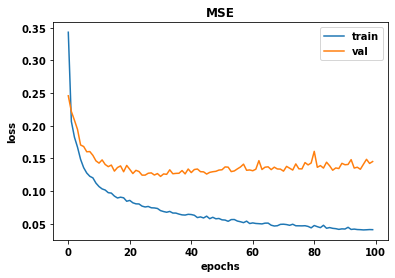

In [11]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.title('MSE')

Text(0.5, 1.0, 'MAE')

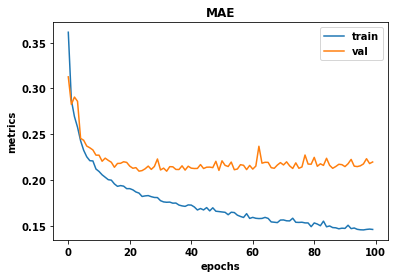

In [12]:
plt.plot(history.history["mean_absolute_error"], label="train")
plt.plot(history.history["val_mean_absolute_error"], label="val")
plt.xlabel("epochs")
plt.ylabel("metrics")
plt.legend(loc="upper right")
plt.title('MAE')

In [13]:
model.load_weights("logs/models/best-model-1.h5")

y_test = np.array(test_data["price"])
mean = test_data.mean()
std = test_data.std()
test_data = (test_data - mean) / std
x_test = np.array(test_data.drop("price", axis=1))

y_pred = model.predict(x_test)

y_pred = np.reshape(y_pred * std["price"] + mean["price"], y_test.shape)
precentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100

print("Model precentage error: {:.2f}%".format(precentage_error))

Model precentage error: 15.24%


In [14]:
# %load_ext tensorboard
# %tensorboard --logdir logs

In [15]:
# %reload_ext tensorboard